In [ ]:
import pandas as pd
import numpy as np
import keras as k
import re
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SpatialDropout1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [ ]:
df_train = pd.read_csv('train_sent_emo.csv')

#change emotion label into num type: {neutral:0, joy:1, anger:2, sadness:3, surprise:4, disgust:5, fear:6}
emo_num = []
for label in df_train['Emotion']:
    if label == 'neutral':
        emo_num.append(0)
    if label == 'joy':
        emo_num.append(1)
    if label == 'anger':
        emo_num.append(2)
    if label == 'sadness':
        emo_num.append(3)
    if label == 'surprise':
        emo_num.append(4)
    if label == 'disgust':
        emo_num.append(5)
    if label == 'fear':
        emo_num.append(6)
df_train['emo_num'] = emo_num
#df

#copy selected columns and create a new dataset
data_train = df_train[['Utterance', 'Emotion', 'emo_num']]
data_train

,Utterance,Emotion,emo_num
0,also I was the point person on my companys tr...,neutral,0
1,You mustve had your hands full.,neutral,0
2,That I did. That I did.,neutral,0
3,So lets talk a little bit about your duties.,neutral,0
4,My duties? All right.,surprise,4
...,...,...,...
9984,You or me?,neutral,0
9985,"I got it. Uh, Joey, women don't have Adam's ap...",neutral,0
9986,"You guys are messing with me, right?",surprise,4
9987,Yeah.,neutral,0


In [ ]:
df_test = pd.read_csv('test_sent_emo.csv')

#change emotion label into num type: {neutral:0, joy:1, anger:2, sadness:3, surprise:4, disgust:5, fear:6}
emo_num = []
for label in df_test['Emotion']:
    if label == 'neutral':
        emo_num.append(0)
    if label == 'joy':
        emo_num.append(1)
    if label == 'anger':
        emo_num.append(2)
    if label == 'sadness':
        emo_num.append(3)
    if label == 'surprise':
        emo_num.append(4)
    if label == 'disgust':
        emo_num.append(5)
    if label == 'fear':
        emo_num.append(6)
df_test['emo_num'] = emo_num
#df

#copy selected columns and create a new dataset
data_test = df_test[['Utterance', 'Emotion', 'emo_num']]
data_test

,Utterance,Emotion,emo_num
0,Why do all youre coffee mugs have numbers on ...,surprise,4
1,Oh. Thats so Monica can keep track. That way ...,anger,2
2,Y'know what?,neutral,0
3,"Come on, Lydia, you can do it.",neutral,0
4,Push!,joy,1
...,...,...,...
2605,"Yeah, I mean, come on Ross, no one will even n...",neutral,0
2606,They’re not listening too me?,surprise,4
2607,Of course they’re listening to you! Everybody ...,neutral,0
2608,Monica you really think I should try this phas...,neutral,0


In [ ]:
#data pre-processing: tokenization
data_train['Utterance'] = data_train['Utterance'].apply(lambda x: x.lower())
data_train['Utterance'] = data_train['Utterance'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))

data_train

/Users/amberwtchang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/amberwtchang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Utterance,Emotion,emo_num
0,also i was the point person on my companys tra...,neutral,0
1,you mustve had your hands full,neutral,0
2,that i did that i did,neutral,0
3,so lets talk a little bit about your duties,neutral,0
4,my duties all right,surprise,4
...,...,...,...
9984,you or me,neutral,0
9985,i got it uh joey women dont have adams apples,neutral,0
9986,you guys are messing with me right,surprise,4
9987,yeah,neutral,0


In [ ]:
#data pre-processing: tokenization
data_test['Utterance'] = data_test['Utterance'].apply(lambda x: x.lower())
data_test['Utterance'] = data_test['Utterance'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))

data_test

/Users/amberwtchang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/amberwtchang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Utterance,Emotion,emo_num
0,why do all youre coffee mugs have numbers on t...,surprise,4
1,oh thats so monica can keep track that way if ...,anger,2
2,yknow what,neutral,0
3,come on lydia you can do it,neutral,0
4,push,joy,1
...,...,...,...
2605,yeah i mean come on ross no one will even noti...,neutral,0
2606,theyre not listening too me,surprise,4
2607,of course theyre listening to you everybody li...,neutral,0
2608,monica you really think i should try this phas...,neutral,0


In [ ]:
#fit data into Tokenizer
#use texts_to_sequences to fit it on the Utterance column.
#42 = max length in test set (max len in train set = 67)
max_features = 2000
MAX_SEQUENCE_LENGTH = 42 
tokenizer = Tokenizer(num_words = max_features, split = ' ')
tokenizer.fit_on_texts(data_train['Utterance'].values)
x_train = tokenizer.texts_to_sequences(data_train['Utterance'].values)
x_train = pad_sequences(x_train, maxlen=MAX_SEQUENCE_LENGTH)
#x_train = pad_sequences(x_train)
x_train

array([[  0,   0,   0, ...,   3,   4, 862],
       [  0,   0,   0, ...,  41, 664, 782],
       [  0,   0,   0, ...,   9,   2,  75],
       ...,
       [  0,   0,   0, ...,  38,  13,  37],
       [  0,   0,   0, ...,   0,   0,  21],
       [  0,   0,   0, ...,  36,  44, 223]], dtype=int32)

In [ ]:
#fit data into Tokenizer
#use texts_to_sequences to fit it on the Utterance column.
#42 = max length in test set (max len in train set = 67)
max_features = 2000
MAX_SEQUENCE_LENGTH = 42 
tokenizer = Tokenizer(num_words = max_features, split = ' ')
tokenizer.fit_on_texts(data_test['Utterance'].values)
x_test = tokenizer.texts_to_sequences(data_test['Utterance'].values)
x_test = pad_sequences(x_test, maxlen=MAX_SEQUENCE_LENGTH)
x_test

array([[   0,    0,    0, ...,   26,    3,  773],
       [   0,    0,    0, ...,  527,  297, 1206],
       [   0,    0,    0, ...,    0,   41,   10],
       ...,
       [   0,    0,    0, ...,  321,    4,    2],
       [   0,    0,    0, ...,   17,   46,  133],
       [   0,    0,    0, ...,    2,   59,  152]], dtype=int32)

In [ ]:
#Since nums of words are different
#? what does the num means?
X_train = sequence.pad_sequences(x_train)
X_test = sequence.pad_sequences(x_test)

print('X_train.shape: ', X_train.shape)
print('X_train: ', X_train)
print('X_test.shape: ', X_test.shape)
print('X_test: ', X_test)

X_train.shape:  (9989, 42)
X_train:  [[  0   0   0 ...   3   4 862]
 [  0   0   0 ...  41 664 782]
 [  0   0   0 ...   9   2  75]
 ...
 [  0   0   0 ...  38  13  37]
 [  0   0   0 ...   0   0  21]
 [  0   0   0 ...  36  44 223]]
X_test.shape:  (2610, 42)
X_test:  [[   0    0    0 ...   26    3  773]
 [   0    0    0 ...  527  297 1206]
 [   0    0    0 ...    0   41   10]
 ...
 [   0    0    0 ...  321    4    2]
 [   0    0    0 ...   17   46  133]
 [   0    0    0 ...    2   59  152]]


In [ ]:
embedding_vector_length = 32
#get one-hot vector
train_y = pd.get_dummies(data_train['emo_num']).values
test_y = pd.get_dummies(data_test['emo_num']).values

print('Shape of label tensor:', train_y.shape)
print('Train label tensor:', train_y)
print('Shape of label tensor:', test_y.shape)
print('Test label tensor:', test_y)
print(type(train_y))



Shape of label tensor: (9989, 7)
Train label tensor: [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
Shape of label tensor: (2610, 7)
Test label tensor: [[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>


In [ ]:
#create LSTM model
#The model will use adam as the optimizer.?
model = Sequential()
#This layer has 32 length vectors that represent each word, according to X_train.shape
model.add(Embedding(max_features, 32 , input_length = X_train.shape[1]))
#SpatialDropout1D performs variational dropout in NLP models.
#model.add(SpatialDropout1D(0.2))
#The next layer is the LSTM layer which has 200 memory units (can be increased if necessary).
model.add(LSTM(50, dropout=0.2))

#model.add(Dense(128, activation = 'relu'))

model.add(Dense(7, activation = 'softmax'))


In [ ]:
#keras precision, recall, f1, micro
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    f1m = 2*((precision*recall)/(precision+recall+K.epsilon()))
    print(f1m)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc', f1_m, precision_m, recall_m])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 42, 32)            64000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 357       
Total params: 80,957
Trainable params: 80,957
Non-trainable params: 0
_________________________________________________________________
Tensor("metrics/f1_m/mul_3:0", shape=(), dtype=float32)


# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

In [ ]:
# fit the model
epochs = 3
batch_size = 32
#history = model.fit(X_train, train_y, validation_split=0.3, epochs=epochs, batch_size=batch_size)
history = model.fit(X_train, train_y, validation_data=(X_test, test_y), epochs=epochs, batch_size=batch_size)

Train on 9989 samples, validate on 2610 samples
Epoch 1/3
9989/9989 [==============================] - 47s 5ms/step - loss: 0.9312 - acc: 0.6725 - f1_m: 0.6488 - precision_m: 0.7552 - recall_m: 0.5716 - val_loss: 2.1163 - val_acc: 0.3797 - val_f1_m: 0.3528 - val_precision_m: 0.4047 - val_recall_m: 0.3142
Epoch 2/3
9989/9989 [==============================] - 49s 5ms/step - loss: 0.9065 - acc: 0.6758 - f1_m: 0.6548 - precision_m: 0.7533 - recall_m: 0.5821 - val_loss: 2.1339 - val_acc: 0.3824 - val_f1_m: 0.3581 - val_precision_m: 0.4073 - val_recall_m: 0.3210
Epoch 3/3
9989/9989 [==============================] - 65s 6ms/step - loss: 0.8816 - acc: 0.6871 - f1_m: 0.6655 - precision_m: 0.7634 - recall_m: 0.5922 - val_loss: 2.2563 - val_acc: 0.3682 - val_f1_m: 0.3427 - val_precision_m: 0.3907 - val_recall_m: 0.3067


In [ ]:
#evaluate the model with f1_score, precision, recall = model.evaluate(X_test, test_y, verbose=0)
train_results = model.evaluate(X_train, train_y)
test_results = model.evaluate(X_test, test_y)
print('train results: loss, acc, f1, pre, recall ', train_results)
print('test results: loss, acc, f1, pre, recall ', test_results)

2610/2610 [==============================] - 5s 2ms/step
train results: loss, acc, f1, pre, recall  [0.7831307011021068, 0.7268995642662048, 0.7142184972763062, 0.7898290157318115, 0.6540734767913818]
test results: loss, acc, f1, pre, recall  [2.256326463578761, 0.3681992292404175, 0.3426573574542999, 0.3907017707824707, 0.30665650963783264]


In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size = 32)

for i in range(len(y_pred)):
        max_value=max(y_pred[i])
        for j in range(len(y_pred[i])):
            if max_value==y_pred[i][j]:
                y_pred[i][j]=1
            else:
                y_pred[i][j]=0

print(classification_report(test_y, y_pred))


              precision    recall  f1-score   support

           0       0.50      0.65      0.57      1256
           1       0.15      0.14      0.14       402
           2       0.20      0.10      0.13       345
           3       0.07      0.05      0.06       208
           4       0.18      0.16      0.17       281
           5       0.06      0.03      0.04        68
           6       0.00      0.00      0.00        50

   micro avg       0.37      0.37      0.37      2610
   macro avg       0.17      0.16      0.16      2610
weighted avg       0.32      0.37      0.34      2610
 samples avg       0.37      0.37      0.37      2610



In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_train, batch_size = 32)

for i in range(len(y_pred)):
        max_value=max(y_pred[i])
        for j in range(len(y_pred[i])):
            if max_value==y_pred[i][j]:
                y_pred[i][j]=1
            else:
                y_pred[i][j]=0

print(classification_report(train_y, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.91      0.80      4710
           1       0.78      0.57      0.66      1743
           2       0.72      0.49      0.59      1109
           3       0.68      0.63      0.66       683
           4       0.75      0.66      0.70      1205
           5       0.79      0.49      0.60       271
           6       0.73      0.26      0.38       268

   micro avg       0.73      0.73      0.73      9989
   macro avg       0.74      0.57      0.63      9989
weighted avg       0.73      0.73      0.71      9989
 samples avg       0.73      0.73      0.73      9989



In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred1 = model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

from sklearn.metrics import classification_report
#labels: {neutral:0, joy:1, anger:2, sadness:3, surprise:4, disgust:5, fear:6}

y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
#target_names = ['neutral', 'joy', 'anger', 'sadness', 'surprise', 'disgust', 'fear']
report = classification_report(y_true, y_pred, target_names=target_names)
print(report)




from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

print(X_test)
y_pred1 = model.predict(X_test)
print('y_pred1: ', y_pred1)
y_pred = np.argmax(y_pred1, axis=1)
print('y_pred: ', y_pred)

#print(precision_score(test_y, y_pred , average='macro'))
#print(recall_score(test_y, y_pred , average='macro'))
#print(f1_score(test_y, y_pred , average='macro'))



from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_recall_fscore_support

def normal_f1(y_true, y_pred):
    normal_f1 = sklearn.metrics.f1_score(y_true, y_pred, average='None')
    score = precision_recall_fscore_support(y_true, y_pred)
    return nor_f1

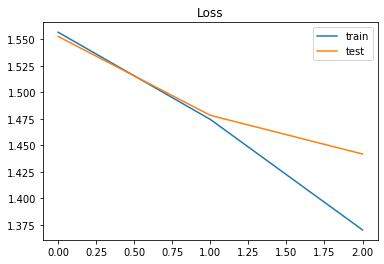

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [ ]:
accr = model.evaluate(X_test,test_y)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

2610/2610 [==============================] - 9s 3ms/step
Test set
  Loss: 1.600
  Accuracy: 0.453


AttributeError: 'list' object has no attribute 'history'

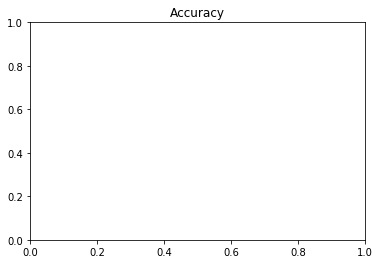

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [ ]:
#time to test emotion of new dialog 
#new_friends_dialog = ["There's just so much pressure."]
#new_friends_dialog = ["I'm so happy now."]
new_friends_dialog = ["This function transforms a list of num_samples sequences (lists of integers) into a 2D Numpy array of shape (num_samples, num_timesteps). num_timesteps is either the maxlen argument i"]
seq = tokenizer.texts_to_sequences(new_friends_dialog)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['neutral', 'joy', 'anger', 'sadness', 'fear', 'disgust', 'surprise']
print(pred, labels[np.argmax(pred)])

[[0.54177827 0.1511546  0.11613991 0.07464378 0.05783507 0.02818299
  0.03026529]] neutral


In [ ]:
#former
model.summary()
epochs = 5
batch_size = 32
history = model.fit(X_train, train_y, epochs=epochs, batch_size=batch_size,validation_split=0.1)
#history = model.fit(X_train, train_y, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 42, 32)            64000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 357       
Total params: 80,957
Trainable params: 80,957
Non-trainable params: 0
_________________________________________________________________


/Users/amberwtchang/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8990 samples, validate on 999 samples
Epoch 1/5
8990/8990 [==============================] - 44s 5ms/step - loss: 1.5479 - accuracy: 0.4699 - val_loss: 1.5340 - val_accuracy: 0.4595
Epoch 2/5
8990/8990 [==============================] - 45s 5ms/step - loss: 1.4349 - accuracy: 0.4949 - val_loss: 1.4609 - val_accuracy: 0.4785
Epoch 3/5
8990/8990 [==============================] - 43s 5ms/step - loss: 1.3318 - accuracy: 0.5273 - val_loss: 1.4229 - val_accuracy: 0.4965
Epoch 4/5
8990/8990 [==============================] - 38s 4ms/step - loss: 1.2616 - accuracy: 0.5565 - val_loss: 1.4380 - val_accuracy: 0.4835
Epoch 5/5
8990/8990 [==============================] - 42s 5ms/step - loss: 1.2047 - accuracy: 0.5770 - val_loss: 1.4522 - val_accuracy: 0.4935
